# Multiple regression analysis実装

[Coursera Machine LearningをPythonで実装 \- \[Week2\]単回帰分析、重回帰分析 \(2\)重回帰分析 · GitHub](https://gist.github.com/koshian2/8b45ff6cf6d65bf30da7935689790402)

[27\-4\. 決定係数と重相関係数 \| 統計学の時間 \| 統計WEB](https://bellcurve.jp/statistics/course/9706.html)

In [10]:
import numpy as np
import matplotlib.pyplot as plt


In [11]:
def multiple_regression(X, Z):
    theta =  np.linalg.pinv((X.T@X) ) @ X.T @ Z    # 正規方程式
    return theta

In [12]:
# データの標準化
def feature_normalize(X):
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    X_norm = (X-mu)/sigma
    return X_norm, mu, sigma

# 最急降下法
def gradient_descent_multi(X, y, theta, alpha, num_iters):
    J_history = []
    theta_out = theta
    for i in range(num_iters):
        print(np.dot(X.T, np.dot(X, theta_out) - y))
        theta_out -= alpha / len(y) * np.dot(X.T, np.dot(X, theta_out) - y)
        J_history.append(compute_cost_multi(X, y, theta_out))
    return theta_out, J_history

# コスト関数
def compute_cost_multi(X, y, theta):
    return np.sum((np.dot(X, theta) - y) ** 2) / 2 / len(y)

In [13]:
def multiple_regression_grad(X, Z, theta, epoch=100, alpha=0.001):
    # epoch = 100
    # alpha = 0.001
    n = X.shape[0]
    m = X.shape[1] - 1

    loss_history = []   

    # print('Init theta: ', theta)
    # print(theta - alpha * (1/m) * X.T@(X@theta.T - Z))
    # print(alpha * (1/m) * X.T@(X@theta.T - Z))
    # print(alpha * (1/m))

    for e in range(epoch):
        # print('Epoch:', e)
        # print('Z: ', Z)
        # print('X@theta.T: ', X@theta.T)
        # print('Z - X@theta.T: ', Z - X@theta.T)
        # print('X[:, 0].T@(Z - X@theta.T): ', X[:, 0].T@(Z - X@theta.T))
        # print('X[:, 1].T@(Z - X@theta.T): ', X[:, 1].T@(Z - X@theta.T))
        # print('X[:, 2].T@(Z - X@theta.T): ', X[:, 2].T@(Z - X@theta.T))
        # print('X.T@(Z - X@theta.T): ', X.T@(Z - X@theta.T))
        # print(alpha * (1/m) * X.T@(Z - X@theta.T))

        theta = theta - alpha/n * X.T@(X@theta.T - Z)
        # theta[0] -= alpha/n * X[:, 0].T@(Z - X@theta.T)
        # theta[1] -= alpha/n * X[:, 1].T@(Z - X@theta.T)
        # theta[2] -= alpha/n * X[:, 2].T@(Z - X@theta.T)
        loss = (1/(2*n))*np.linalg.norm(X@theta.T - Z)**2
        loss_history.append(loss)
        # print('Cost:', loss)
        # print('J:', compute_cost_multi(X, Z, theta))
        # print('')
    return theta, loss_history

[ 1.645545   -0.63255986  5.55503798]


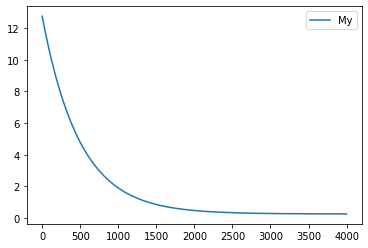

[ 6.3271215   9.47276849  9.47276849  7.01716949 11.14725393]
[ 6.2  9.3  9.3  7.5 13.3]
[0.1271215  0.17276849 0.17276849 0.48283051 2.15274607]


In [14]:

# 入力データ
X = np.array([
    [70.0,68.0,1.0],
    [75,82,1],
    [80,71,1],
])

# 出力データ
Z = np.array([
    87,
    86,
    93,
]
)

# ----- sample data
data = np.loadtxt('data/sample_rent1.csv', delimiter=',', skiprows=1)
X = np.c_[data[:, 1:3], np.ones(len(data))]
Z = data[:, 3]
# ----- sample data

X[:, 0], mu, sigma = feature_normalize(X[:, 0])
X[:, 1], mu, sigma = feature_normalize(X[:, 1])

theta_init = np.ones(X.shape[1])
theta, loss = multiple_regression_grad(X, Z, theta_init, 4000, 0.001)
# theta
print(theta)
# print(X@theta.T)
# theta = np.ones(X.shape[1])
# theta, J_history = gradient_descent_multi(X, Z, theta, 0.001, 100)
# theta

# X = np.array([
#     [70.0,68.0,1.0],
#     [75,82,1],
#     [80,71,1],
# ])
# X@theta.T

plt.plot(loss, label='My')
# plt.plot(J_history, label='Git')
plt.legend()
plt.show()

print((X@theta.T)[0:5])
print(Z[0:5])
print( abs(X@theta.T-Z)[:5])


Z_mu = np.mean(Z)


In [15]:
# 入力データ
X = np.array([
    [70,68,1],
    [75,82,1],
    [80,71,1],
])

# 出力データ
Z = np.array([
    87,
    86,
    93,
]
)

# ----- sample data
data = np.loadtxt('data/sample_rent1.csv', delimiter=',', skiprows=1)
X = np.c_[data[:, 1:3], np.ones(len(data))]
Z = data[:, 3]
# ----- sample data

print(np.linalg.det(X.T@X))

# X[:, 0] = X[:, 1]/max(X[:, 0])
# X[:, 1] = X[:, 1]/max(X[:, 1])

theta = multiple_regression(X, Z)
theta

print((X@theta.T)[0:5])
print(Z[0:5])
print( abs(X@theta.T-Z)[:5])

plt.scatter


31029120546119.348
[ 6.44775817  9.58992875  9.58992875  7.15268645 11.26849098]
[ 6.2  9.3  9.3  7.5 13.3]
[0.24775817 0.28992875 0.28992875 0.34731355 2.03150902]


<function matplotlib.pyplot.scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, *, edgecolors=None, plotnonfinite=False, data=None, **kwargs)>

In [16]:
Z_mu = np.mean(Z)

# 全変動の平方和
Sall = np.sum( (Z-Z_mu)**2)
Sall

# 残差変動の平方和	
Sres = np.sum( (Z - X@theta.T)**2 )
Sres

# 決定係数
R = 1-Sres/Sall
R

# 自由度調整済み決定係数
R2 = 1-(Sres/(len(Z)-X.shape[1]-1-1))/(Sall/ (len(Z)-1))
R2

print(R)
print(R2)


0.8689657636826227
0.8683570099715082


<ipython-input-17-881d0751263f>:4: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


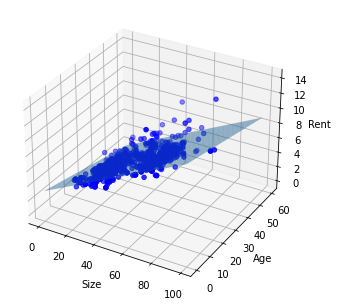

In [17]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter3D(np.ravel(X[:,0]), np.ravel(X[:,1]), np.ravel(Z), c = 'red')

#3D描画（回帰平面の描画）
X, Y = np.meshgrid(np.arange(0, 100, 1), np.arange(0, 60, 1))
Z = theta[0] * X + theta[1] * Y + theta[2]
ax.plot_surface(X, Y, Z, alpha = 0.5) #alphaで透明度を指定

# ax.plot_wireframe(X, Y, Z)

ax.set_xlabel("Size")
ax.set_ylabel("Age")
ax.set_zlabel("Rent")

plt.show()